<a href="https://colab.research.google.com/github/ThanabordeeN/AI_Tranfer-Learning-And-FineTune/blob/main/Medical_Cost_Personal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data from insurance dataset from link address
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
# Check dataset that read from link address
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**One-hot encoding** <br>
เนื่องจากข้อมูลที่ได้มานั้นมีทั้งข้อมูลที่เป็นข้อความแต่ neural network นั้นไม่สามารถรับ input ที่เป็นลักษณะของข้อความได้จึงต้องทำการ Encode ให้เป็นตัวเลขเสียก่อนเพื่อให้ neural network สามารถเข้าใจได้

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


ทำการแยกส่วนของ Features ( X ) และส่วนของคำตอบ (Y) โดยในโมเดลนี้ได้เลือก Column "Charges" เป็นคำตอบ ( Y ) ดังนั้นจึงต้องทำการตัดส่วนนี้ออกและให้ข้อมูล Column อื่น ๆ เป็น Features ให้กับโมเดล

In [ ]:
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [ ]:
# Show data after drop Y label
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Show answer (Y)
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**แบ่งชุดข้อมูลสำหรับการสร้างโมเดล [ train set, test set ]**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # test_size 20 %
                                                    random_state = 42) # random_state เป็นการสุ่มทีละจำนวนกี่ตัว ex. 42 ตัว

In [ ]:
X.shape, X_train.shape, X_test.shape

((1338, 11), (1070, 11), (268, 11))

In [ ]:
y.shape, y_train.shape, y_test.shape

((1338,), (1070,), (268,))

**Build and fit a model**

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Create a new model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile model
insurance_model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

In [ ]:
m1 = insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7735.9116 - mae: 7735.9116

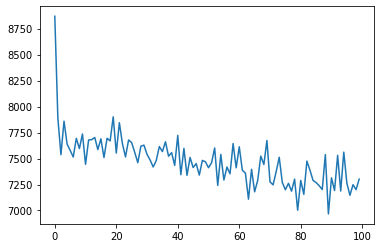

In [ ]:
# Plot graph of loss value
plt.plot(m1.history['loss'])

จาก Graph ของค่า loss จะพบว่าค่า loss สูงมาก ถ้างั้นลองทำให้โมเดลมีความซับซ้อนมากขึ้น โดยลองทำ 3 สิ่งนี้ <br>
1) เพิ่มจำนวนชั้นของ Layers จาก 2 เป็น 3 ชั้น <br>
2) เพิ่มจำนวน units ของแต่ละ layers <br>
3) เปลี่ยน optimization func. จาก SGD เป็น Adam <br>
4) เพิ่มจำนวนรอบในการ Train model (epochs)

In [ ]:
tf.random.set_seed(42)
# Build new model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units in layers
    tf.keras.layers.Dense(10), # 10 units in layers
    tf.keras.layers.Dense(1) # 1 units for output layers
])

In [ ]:
# Compile model
insurance_model_2.compile(loss = 'mae', optimizer = 'Adam', metrics = ['mae'])

In [ ]:
# Fit model again !
m2 = insurance_model_2.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

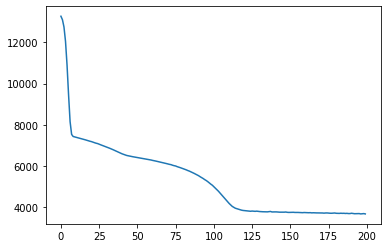

In [ ]:
# Plot loss
plt.plot(m2.history['loss'])